In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers
import numpy as np
import matplotlib.pyplot as plt



In [9]:
# Load dataset (CIFAR-10 as an example)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

In [10]:
# Data Augmentation (Regularization Technique)
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [11]:
# Define CNN Model with Regularization
input_tensor = keras.Input(shape=(32, 32, 3))
x = data_augmentation(input_tensor)  # Apply data augmentation
x = layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)  # Batch Normalization
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)  # Dropout Layer

x = layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

output_tensor = layers.Dense(10, activation='softmax')(x)

In [12]:
#  Create Model
model = models.Model(inputs=input_tensor, outputs=output_tensor)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#  Train the CNN Model
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))



Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.2975 - loss: 2.5548 - val_accuracy: 0.4384 - val_loss: 1.9686
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4529 - loss: 1.8360 - val_accuracy: 0.4822 - val_loss: 1.7303
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4950 - loss: 1.6981 - val_accuracy: 0.5669 - val_loss: 1.5006
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5146 - loss: 1.6772 - val_accuracy: 0.5241 - val_loss: 1.6542
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.5317 - loss: 1.6439 - val_accuracy: 0.4291 - val_loss: 2.0114
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.5343 - loss: 1.6384 - val_accuracy: 0.5446 - val_loss: 1.6155
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.5528 - loss: 1.6182 - val_accuracy: 0.6083 - val_loss: 1.4616
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.5531 -

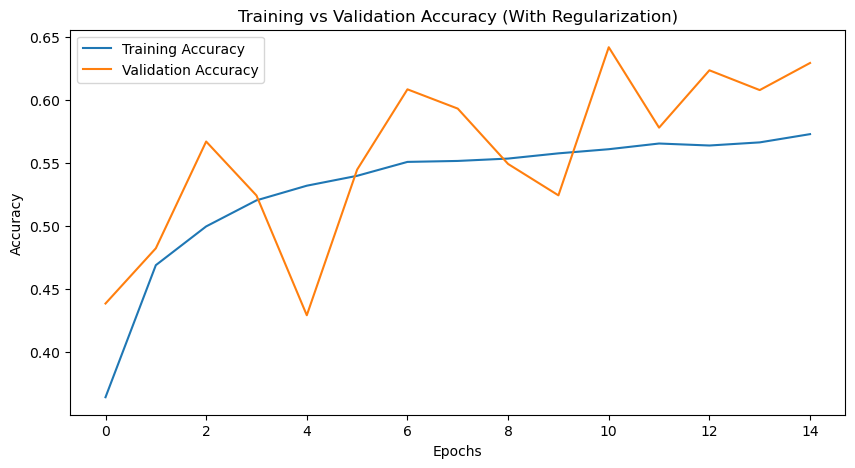

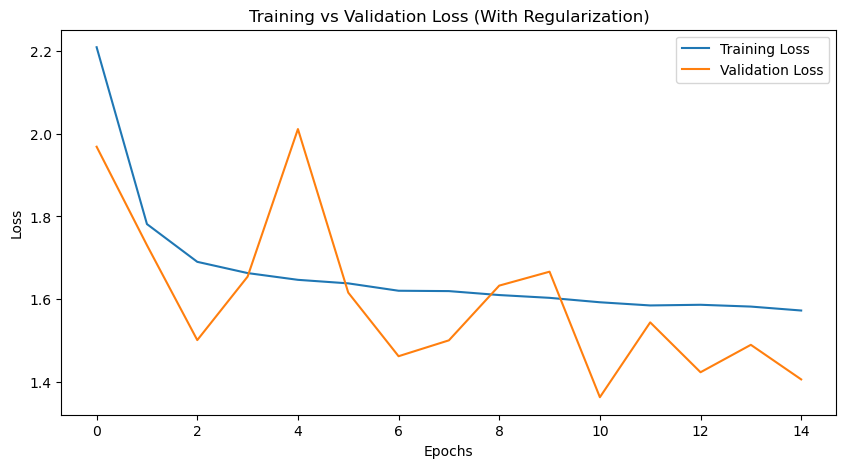

In [14]:
# Plot Training vs Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (With Regularization)")
plt.legend()
plt.show()

# Plot Training vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (With Regularization)")
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import classification_report

# ✅ Get Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# ✅ Compute Precision, Recall, and F1-Score
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1000
           1       0.68      0.87      0.76      1000
           2       0.60      0.44      0.51      1000
           3       0.52      0.35      0.42      1000
           4       0.73      0.31      0.43      1000
           5       0.71      0.45      0.55      1000
           6       0.45      0.89      0.60      1000
           7       0.66      0.75      0.70      1000
           8       0.71      0.84      0.77      1000
           9       0.74      0.72      0.73      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.62     10000
weighted avg       0.65      0.63      0.62     10000

